In [3]:
import numpy as np
import sys
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Parallel_Simulation')
from Data_Treatement import *
import matplotlib.pyplot as plt
media = "/media/hcleroy/Simulation_Res/Parallel_Simulation_aging/fixed_density/"
from matplotlib import colormaps
cm = colormaps['viridis']
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
from scipy.optimize import least_squares

In [4]:
NAMEs = ['N5_L100','N10_L200','N25_L500','N25_L500_b','N50']
N = [5,10,25,25,50]
L = [100,200,500,500,1000]
NAMEs = ['mu5e_2']

In [5]:
Entropies = list()
NRGs = list()
for name in NAMEs:
    Entropies.append(Data_Treatement(media+name+'.hdf',data_type='Entropy'))
    NRGs.append(Data_Treatement(media+name+'.hdf',data_type='NRG'))
for entropy,nrg  in zip(Entropies,NRGs):
    entropy.average(num_bins=100,log_scale=True)
    nrg.average(num_bins=100,log_scale=True)

/home/hcleroy/PostDoc/aging_condensates/Simulation/Parallel_Simulation/Data_Treatement.py:275: RuntimeWarning: invalid value encountered in divide
  weighted_average /=count


In [7]:
Finitial = lambda N,L,E: E*N - 1.5*((N-1)*np.log((3*(N+1))/(2*np.pi*L))  - (N+1)/(2*(N-1)))#-2*np.log(4*np.pi)
Sfree = lambda L : L*np.log(4*np.pi)

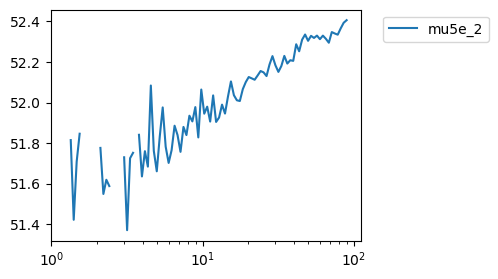

In [8]:
fig,ax = plt.subplots(ncols=1,figsize=(4,3))
n=0
for Entropy,NRG in zip(Entropies,NRGs):#[i:i+1]):
    X,Y = NRG.binned_time[1:],NRG.average_data[1:]-Entropy.average_data[1:]
    ax.plot(X,(Y+Sfree(L[n]))/Finitial(N[n],L[n],-15),label=NAMEs[n])
    n+=1
ax.set_xscale('log')
#ax.set_ylim(-3.1,-2.9)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
#ax.scatter(time_shift,[0 for _ in range(time_shift.shape[0])])

In [6]:
for nrg in NRGs:
    print(nrg.attributes)

{'ell_tot': 100, 'Energy': -15, 'kdiff': 0.001, 'seed': 810497, 'Nlinker': 5, 'dimension': 3, 'step_tot': 100000, 'check_steps': 10000, 'coarse_grained_step': 10, 'cluster_max_distance': "{'cluster': (<class 'Cluster.Cluster'>, (3.0,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.5, 10)), 'PCF': (<class 'PCF.PCF'>, (15.811388300841896, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (1000, 30)), 'NRG': (<class 'Energy.NRG'>, ())}", 'MSD_args': {'NRG': True, 'cluster': True, 'MSD': False, 'ISF': True, 'PCF': False, 'PCF_L': False}, 'ISF_arg': 1.5}
{'ell_tot': 200, 'Energy': -15, 'kdiff': 0.001, 'seed': 810497, 'Nlinker': 10, 'dimension': 3, 'step_tot': 100000, 'check_steps': 10000, 'coarse_grained_step': 10, 'cluster_max_distance': "{'cluster': (<class 'Cluster.Cluster'>, (3.0,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.5, 10)), 'PCF': (<class 'PCF.PCF'>, (15.811388300841896, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (1000, 30)), 'NRG': (<class 'Energy.NRG'>, ())